In [1]:
# Import required libraries
import pandas as pd

In [2]:
# Call the data
# more datasets on https://vincentarelbundock.github.io/Rdatasets/datasets.html
df= pd.read_csv("Fatalities.csv")
# Drop non parametric data scales columns (nominal and ordinal)
df=df.select_dtypes(exclude=['object'])
df=df.iloc[0:,1:]
df=df.dropna()
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 336 entries, 0 to 335
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          336 non-null    int64  
 1   spirits       336 non-null    float64
 2   unemp         336 non-null    float64
 3   income        336 non-null    float64
 4   emppop        336 non-null    float64
 5   beertax       336 non-null    float64
 6   baptist       336 non-null    float64
 7   mormon        336 non-null    float64
 8   drinkage      336 non-null    float64
 9   dry           336 non-null    float64
 10  youngdrivers  336 non-null    float64
 11  miles         336 non-null    float64
 12  fatal         336 non-null    int64  
 13  nfatal        336 non-null    int64  
 14  sfatal        336 non-null    int64  
 15  fatal1517     336 non-null    int64  
 16  nfatal1517    336 non-null    int64  
 17  fatal1820     336 non-null    int64  
 18  nfatal1820    336 non-null    

,year,spirits,unemp,income,emppop,beertax,baptist,mormon,drinkage,dry,...,nfatal2124,afatal,pop,pop1517,pop1820,pop2124,milestot,unempus,emppopus,gsp
0,1982,1.37,14.4,10544.152344,50.692039,1.539379,30.355700,0.32829,19.00,25.006300,...,32,309.437988,3942002.25,208999.593750,221553.43750,290000.06250,28516.0,9.7,57.799999,-0.022125
1,1983,1.36,13.7,10732.797852,52.147030,1.788991,30.333599,0.34341,19.00,22.994200,...,35,341.834015,3960008.00,202000.078125,219125.46875,290000.15625,31032.0,9.6,57.900002,0.046558
2,1984,1.32,11.1,11108.791016,54.168087,1.714286,30.311501,0.35924,19.00,24.042601,...,34,304.872009,3988991.75,196999.968750,216724.09375,288000.15625,32961.0,7.5,59.500004,0.062798
3,1985,1.28,8.9,11332.626953,55.271137,1.652542,30.289499,0.37579,19.67,23.633900,...,45,276.742004,4021007.75,194999.734375,214349.03125,284000.31250,35091.0,7.2,60.100002,0.027490
4,1986,1.23,9.8,11661.506836,56.514496,1.609907,30.267401,0.39311,21.00,23.464701,...,29,360.716003,4049993.75,203999.890625,212000.00000,263000.28125,36259.0,7.0,60.700001,0.032143


In [3]:
# Bartlett's Test
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(df)
chi_square_value, p_value

(24625.54785893719, 0.0)

In [4]:
# Kaiser-Meyer-Olkin (KMO) Test
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(df)
kmo_model

0.8653515853401671

In [5]:
# Create factor analysis object and perform factor analysis
from factor_analyzer import FactorAnalyzer
fa = FactorAnalyzer(n_factors=4,rotation='varimax')
fa.fit(df)
# fa.loadings_
# fa.analyze(df, 25, rotation=None)
# # Check Eigenvalues
ev, v = fa.get_eigenvalues()
ev

array([1.44686877e+01, 4.85767116e+00, 2.82293357e+00, 1.51684906e+00,
       1.32765611e+00, 1.03302680e+00, 8.24472307e-01, 6.11919338e-01,
       5.51825829e-01, 4.60043508e-01, 3.69222769e-01, 2.97217870e-01,
       2.18205423e-01, 1.54669892e-01, 1.30287889e-01, 1.21751023e-01,
       7.20399048e-02, 3.83820864e-02, 3.29840016e-02, 2.61086756e-02,
       2.50844401e-02, 1.44946592e-02, 6.63133419e-03, 6.18521960e-03,
       4.60805737e-03, 2.44879431e-03, 1.86996616e-03, 1.55519516e-03,
       7.64177873e-04, 4.03206911e-04])

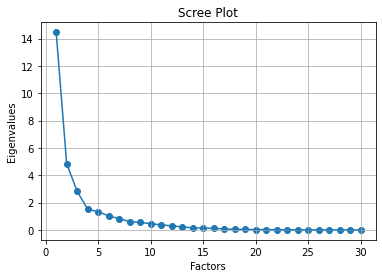

In [6]:
# Create scree plot using matplotlib
import matplotlib.pyplot as plt
plt.scatter(range(1,df.shape[1]+1),ev)
plt.plot(range(1,df.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalues')
plt.grid()
plt.show()

In [7]:
loadings=fa.loadings_
columns_name=df.columns
df2=pd.DataFrame.from_records(loadings)
df2=df2.assign(Variables=columns_name)
df2=df2.rename(columns={0:'Factor 1',1:'Factor 2',2:'Factor 3',3:'Factor 4'})
df2=df2.set_index('Variables')
df2

,Factor 1,Factor 2,Factor 3,Factor 4
Variables,,,,
year,-0.025165,0.984064,0.041363,0.008435
spirits,-0.068102,-0.212795,0.598029,-0.162735
unemp,0.101217,-0.497349,-0.735703,0.013018
income,0.287876,0.279500,0.634374,-0.463996
emppop,-0.166587,0.274495,0.758898,-0.106476
beertax,-0.001503,-0.065010,-0.024190,0.699732
baptist,0.114460,0.013996,-0.296262,0.864175
mormon,-0.174942,-0.014759,-0.072071,-0.038003
drinkage,0.031052,0.405579,0.059517,0.020911


In [14]:
# get var%
df_var=pd.DataFrame.from_records(fa.get_factor_variance())
fv=['SS Loadings','Proportion Var','Cummulative Var']
df_var=df_var.assign(Factor_variance=fv)
df_var=df_var.rename(columns={0:'Factor 1',1:'Factor 2',2:'Factor 3',3:'Factor 4','Factor_variance':'Factor Variance'})
df_var=df_var.set_index('Factor Variance')
df_var

,Factor 1,Factor 2,Factor 3,Factor 4
Factor Variance,,,,
SS Loadings,14.393682,4.052226,2.334066,1.880683
Proportion Var,0.479789,0.135074,0.077802,0.062689
Cummulative Var,0.479789,0.614864,0.692666,0.755355
